# A Tour of Plot Types

In [7]:
# Python comments begin with '#'

import matplotlib.pyplot as plt   # Plotting library, renamed to 'plt'
import numpy as np                # Numeric and array library, renamed to 'np'
import pandas as pd               # Data loading and handling library, renamed to 'pd'
import seaborn as sns             # Fancy plotting libary, renamed to 'sns'

## Barchart / Barplot

Useful for:

* Showing proportional relationships between data
* Showing values of **categorical** data

Be mindful that the origin of the barchart is meaningful and not misleading

In [8]:
cal1_path = r'data/calorie_before.csv'
cal2_path = r'data/calorie_after.csv'
cal1 = pd.read_csv(cal1_path)
cal2 = pd.read_csv(cal2_path)

display(cal1)


,Day,S1,S2,S3,S4
0,1,112.423548,125.512751,98.614480,91.192359
1,2,115.245977,89.901201,103.533011,128.413137
2,3,116.562606,102.958093,100.891608,134.421370
3,4,107.005112,105.549231,87.446995,129.015227
4,5,103.228177,111.251797,88.344222,131.415125
5,6,80.499291,107.435113,96.354232,123.238709
6,7,89.442310,102.949719,99.776575,93.817733
7,8,122.003110,113.057113,89.767820,90.770869
8,9,112.968066,105.023948,102.105141,127.833899
9,10,81.961624,110.399760,94.111907,133.641025


Text(0.5, 1.0, 'Caloric Intake, before')

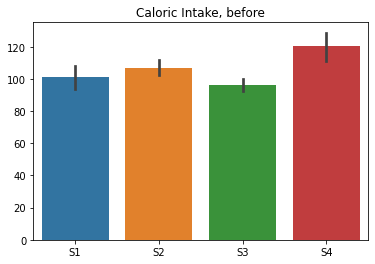

In [9]:
ax = sns.barplot(data=cal1.drop('Day',axis=1))
ax.set_title('Caloric Intake, before')

Text(0.5, 1.0, 'Caloric Intake, after')

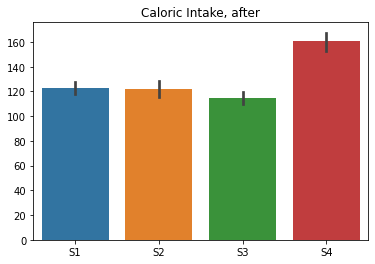

In [11]:
ax = sns.barplot(data=cal2.drop('Day',axis=1))
ax.set_title('Caloric Intake, after')

### Joining the data

It can be convenient to join the data together into one dataset.

First we add a column to distinguish

In [71]:
cal1['Stage'] = 'Before'
cal2['Stage'] = 'After'

cal_total = pd.concat([cal1,cal2])

In [74]:
cal_tall = cal_total.melt(id_vars=['Day','Stage'], value_vars=['S1','S2','S3','S4'], 
                      value_name='Caloric Intake', var_name='Sample')

cal_tall = cal_total.melt(id_vars=['Day','Stage'], value_name='Caloric Intake', var_name='Sample')
cal_tall

,Day,Stage,Sample,Caloric Intake
0,1,Before,S1,112.423548
1,2,Before,S1,115.245977
2,3,Before,S1,116.562606
3,4,Before,S1,107.005112
4,5,Before,S1,103.228177
...,...,...,...,...
107,10,After,S4,153.025934
108,11,After,S4,173.165252
109,12,After,S4,173.606221
110,13,After,S4,149.882993


## Filter Based on Column Value

<AxesSubplot:xlabel='Sample', ylabel='Caloric Intake'>

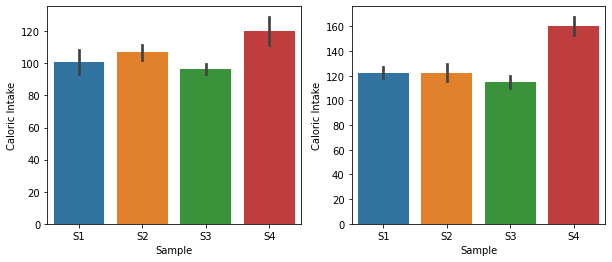

In [75]:
fig,axs = plt.subplots(ncols=2, figsize=(10,4))

sns.barplot(data=cal_tall[cal_tall['Stage']=='Before'],x='Sample',y='Caloric Intake', ax=axs[0])

sns.barplot(data=cal_tall[cal_tall['Stage']=='After'],x='Sample',y='Caloric Intake', ax=axs[1])

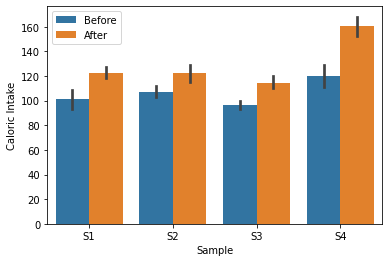

In [76]:
ax = sns.barplot(data=cal_tall, x='Sample', y='Caloric Intake',hue='Stage')
ax.legend(loc='upper left');

## Scatter plot

A scatter plot shows individual data pointsof one numerical value versus another.

Good for:

* Showing measured data
* Showing distribution of results

<AxesSubplot:xlabel='Day', ylabel='Caloric Intake'>

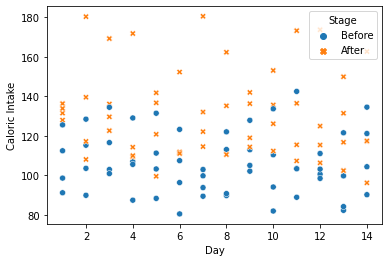

In [77]:
sns.scatterplot(data=cal_tall, x='Day', y='Caloric Intake', hue='Stage', style='Stage')

## Line Plot

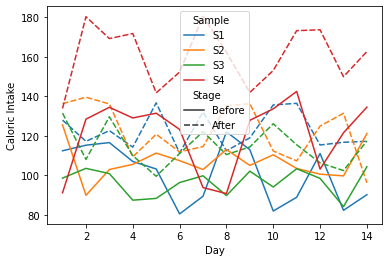

In [79]:
ax = sns.lineplot(data=cal_tall, x='Day', y='Caloric Intake', hue='Sample', style='Stage')

## Histogram



<AxesSubplot:xlabel='Caloric Intake', ylabel='Count'>

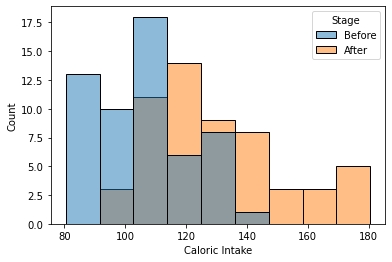

In [81]:
sns.histplot(data=cal_tall,x='Caloric Intake', hue='Stage')


## Box plot

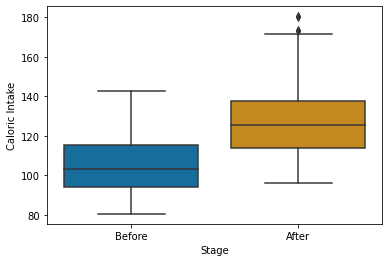

In [83]:
sns.boxplot(data=cal_tall, x='Stage', y='Caloric Intake', palette='colorblind');

## Swarm Plot

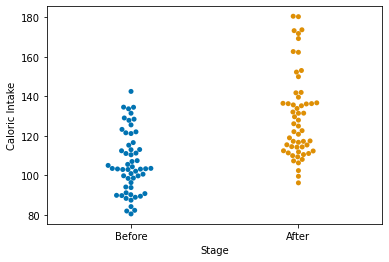

In [85]:
sns.swarmplot(data=cal_tall, x='Stage', y='Caloric Intake', palette='colorblind');

## Violin Plot

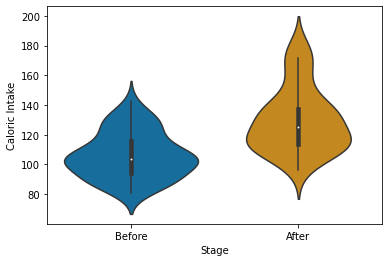

In [87]:
sns.violinplot(data=cal_tall, x='Stage', y='Caloric Intake', palette='colorblind');

## Mixing Plots

<AxesSubplot:xlabel='Stage', ylabel='Caloric Intake'>

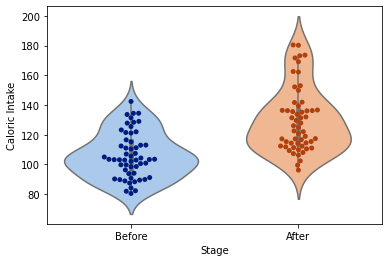

In [89]:
sns.violinplot(data=cal_tall, x='Stage', y='Caloric Intake', palette='pastel');  # search "seaborn palettes" for more info"
sns.swarmplot(data=cal_tall, x='Stage', y='Caloric Intake', palette='dark')

## Heat map

<AxesSubplot:>

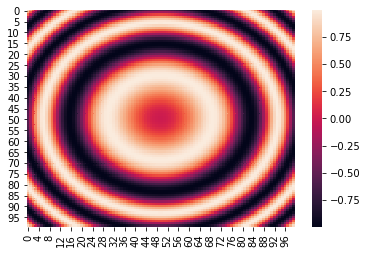

In [95]:
# ax is the Axes
xs = np.linspace(-10,10,100)
ys = np.linspace(-10,10,100)

xss,yss = np.meshgrid(xs,ys)

zss1 = np.sin(xss)**2
zss2 = np.sin(yss)
zss3 = np.exp(-(xss**2 + yss**2)/15)
zss4 = np.sin((xss**2 + yss**2)/10)

sns.heatmap(zss4)

Example from Seaborn website (https://seaborn.pydata.org/generated/seaborn.heatmap.html)
(Also check city_temp file)

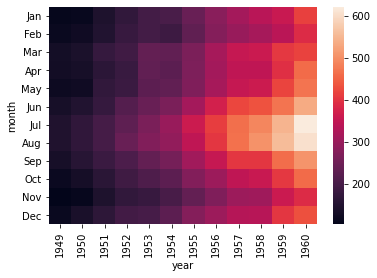

In [3]:
flights = sns.load_dataset("flights")

flights = flights.pivot("month", "year", "passengers")

ax = sns.heatmap(flights)

## Twin Axis

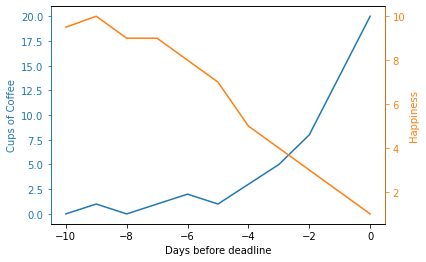

In [5]:
coffee = pd.read_excel('images/coffee.xlsx')


x = coffee['Days before deadline']
y = coffee['Cups of Coffee']
y2 = coffee['Happiness']
fig, ax = plt.subplots(dpi=72)
twinx = ax.twinx()
sns.lineplot(data=coffee, x='Days before deadline', y='Happiness', ax=twinx, color='C1')
sns.lineplot(data=coffee, x='Days before deadline', y='Cups of Coffee', ax=ax, color='C0')



ax.spines['left'].set_color('C0')
ax.yaxis.label.set_color('C0')
ax.tick_params(axis='y', colors='C0')

twinx.spines['left'].set_color('C0')
twinx.spines['right'].set_color('C1')
twinx.yaxis.label.set_color('C1')
twinx.tick_params(axis='y', colors='C1')
